In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
df = pd.read_csv('Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250527.csv')

In [3]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB
None
Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64


In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15320\2263964175.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [5]:
df = df.sort_values(by='Date')

In [6]:
print(df.describe()) 

                      Date   Local Route    Light Rail  Peak Service  \
count                 1918   1918.000000   1918.000000   1918.000000   
mean   2022-02-13 12:00:00   9891.395203   7195.446298    179.581335   
min    2019-07-01 00:00:00      1.000000      0.000000      0.000000   
25%    2020-10-22 06:00:00   3044.500000   4463.500000      0.000000   
50%    2022-02-13 12:00:00  11417.000000   7507.000000    193.000000   
75%    2023-06-07 18:00:00  15517.500000  10008.250000    313.750000   
max    2024-09-29 00:00:00  21070.000000  15154.000000   1029.000000   
std                    NaN   6120.715714   3345.616428    156.532738   

        Rapid Route       School        Other  
count   1918.000000  1918.000000  1898.000000  
mean   12597.213243  2352.694995    43.390411  
min        0.000000     0.000000     0.000000  
25%     6383.000000     0.000000    14.000000  
50%    13106.500000   567.500000    40.000000  
75%    17924.750000  4914.000000    68.000000  
max    28678.00

In [8]:
import matplotlib.pyplot as plt

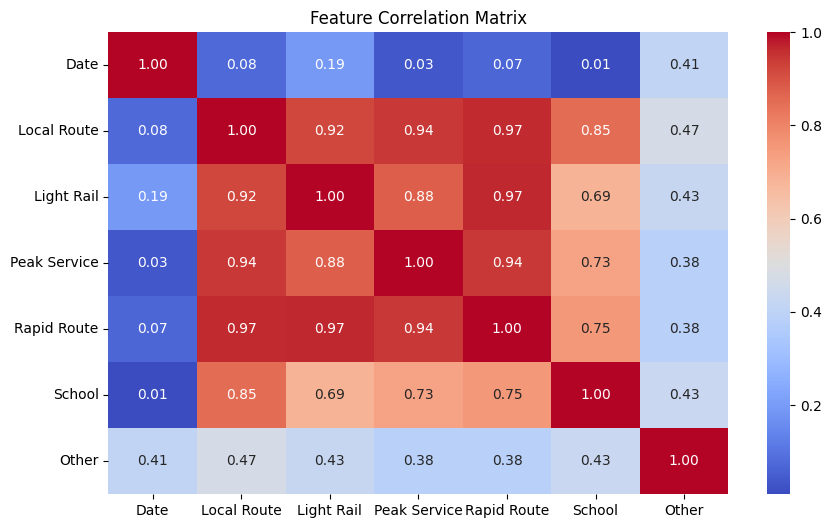

In [11]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [19]:
import statsmodels.api as sm

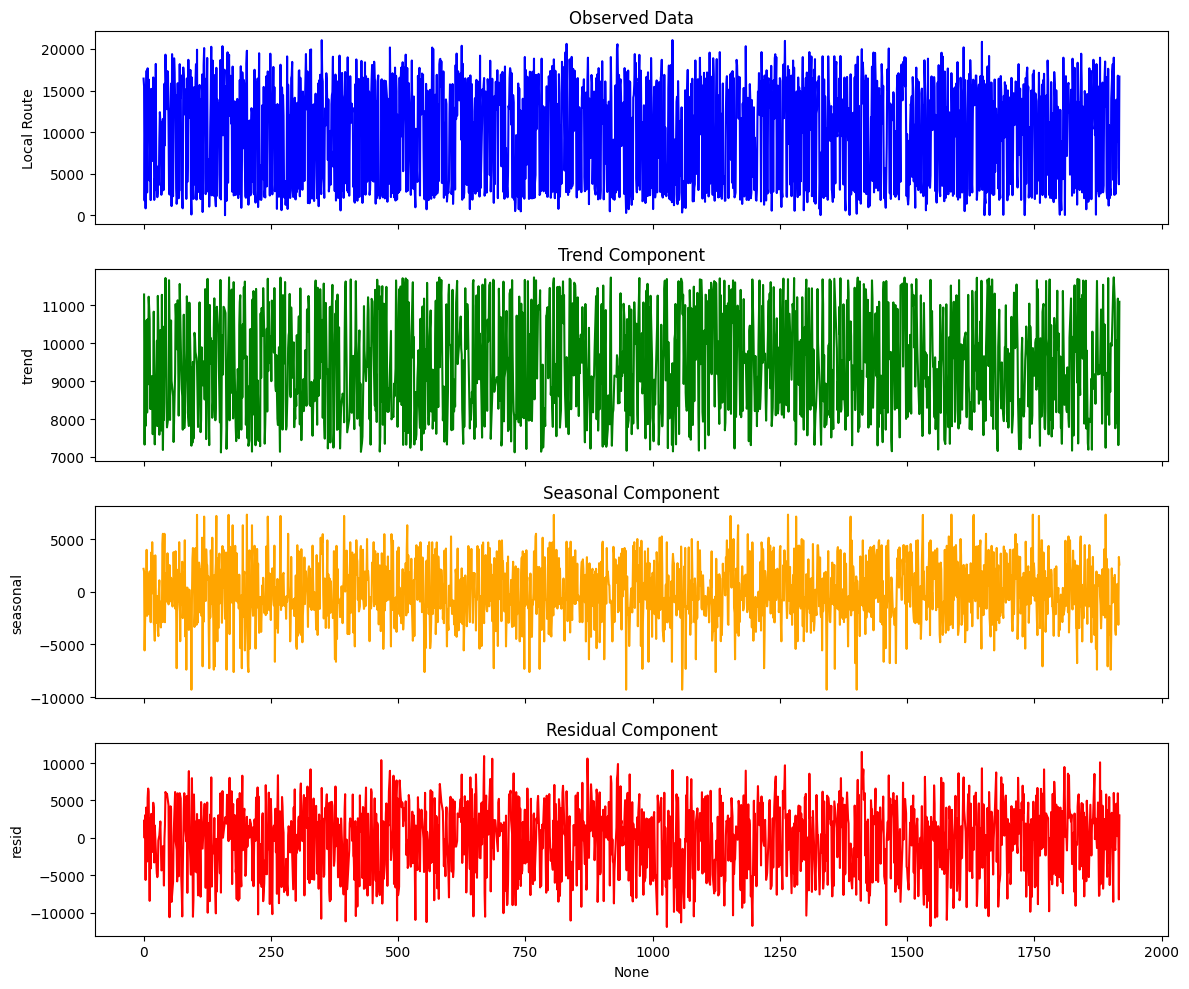

In [21]:
# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df["Local Route"], model="additive", period=365)  # Adjust period based on data frequency

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

# Plot observed data
sns.lineplot(x=df.index, y=decomposition.observed, ax=axes[0], color="blue")
axes[0].set_title("Observed Data")

# Plot trend component
sns.lineplot(x=df.index, y=decomposition.trend, ax=axes[1], color="green")
axes[1].set_title("Trend Component")

# Plot seasonal component
sns.lineplot(x=df.index, y=decomposition.seasonal, ax=axes[2], color="orange")
axes[2].set_title("Seasonal Component")

# Plot residuals
sns.lineplot(x=df.index, y=decomposition.resid, ax=axes[3], color="red")
axes[3].set_title("Residual Component")

plt.tight_layout()
plt.show()

In [24]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
print("\nOutliers detected using IQR:")
print(df[numeric_cols][outliers_iqr.any(axis=1)])


Outliers detected using IQR:
      Local Route  Light Rail  Peak Service  Rapid Route  School  Other  \
23           3020        5112             0         6761       0  171.0   
1567        19515       12465           386        26030    6147  150.0   
116           379         506             0          850       0    0.0   
1516          891         778             0         1523       0    0.0   
1537          586         688             0         1049       0    0.0   
...           ...         ...           ...          ...     ...    ...   
798         16397       11100          1029        19102    4550   81.0   
1330            9           0             0            0       2    NaN   
1731            6           0             0           13       0    NaN   
1652            1           0             0            4       0    NaN   
160             1           0             0            3       0    NaN   

          Smoothed  
23    14287.285714  
1567  14724.000000  
116   

In [25]:
# Remove outliers using IQR method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filtering data by keeping only values within 1.5 * IQR range
df_cleaned = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nDataset after removing outliers:")
print(df_cleaned.head())


Dataset after removing outliers:
           Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
1013 2019-07-01        15987        9962           407        21223    3715   
1120 2019-07-02        16895       10656           409        21715    3993   
1451 2019-07-03        16613       10658           427        22025    3638   
1171 2019-07-04        16604       10445           437        21868    3576   
1523 2019-07-05        16040       10532           400        20697    2856   

      Other  Smoothed  
1013    NaN       NaN  
1120    NaN       NaN  
1451    NaN       NaN  
1171    NaN       NaN  
1523    NaN       NaN  


In [26]:
df["Other"].fillna(method="ffill", inplace=True)  # Forward fill

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15320\3025899061.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Other"].fillna(method="ffill", inplace=True)  # Forward fill
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15320\3025899061.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Other"].fillna(method="ffill", inplace=True)  # Forward fill


In [27]:
df.isnull().sum()

Date            0
Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           7
Smoothed        6
dtype: int64

In [28]:
df["Other"].fillna(method="bfill", inplace=True)  # Forward fill

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15320\3836850220.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Other"].fillna(method="bfill", inplace=True)  # Forward fill
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15320\3836850220.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Other"].fillna(method="bfill", inplace=True)  # Forward fill


In [29]:
df.isnull().sum()

Date            0
Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
Smoothed        6
dtype: int64

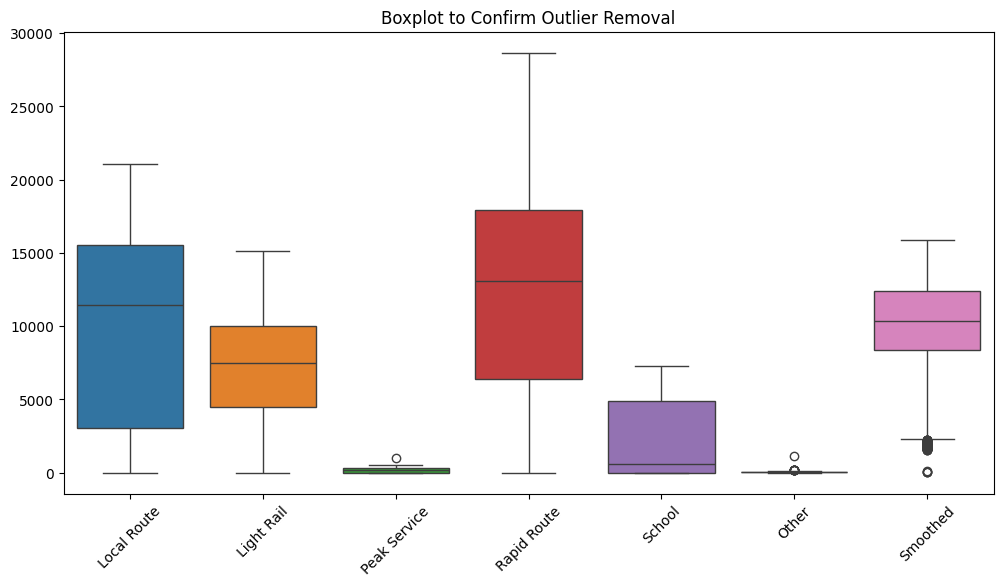

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include="number"))
plt.title("Boxplot to Confirm Outlier Removal")
plt.xticks(rotation=45)
plt.show()


In [32]:
from statsmodels.tsa.stattools import adfuller

In [34]:
target_column = "Local Route"  
adf_test = adfuller(df[target_column])

# Print results
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"{key}: {value}")

# Interpretation
if adf_test[1] < 0.05:
    print("✅ The data is stationary (p-value < 0.05).")
else:
    print("❌ The data is non-stationary (p-value > 0.05). Consider differencing or transformation.")

ADF Statistic: -4.580035661257344
p-value: 0.0001405680369891524
Critical Values:
1%: -3.4338036790464495
5%: -2.8630656035129878
10%: -2.5675821738080615
✅ The data is stationary (p-value < 0.05).


In [35]:
target_column = "Light Rail"
adf_test = adfuller(df[target_column])

# Print results
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"{key}: {value}")

# Interpretation
if adf_test[1] < 0.05:
    print("✅ The data is stationary (p-value < 0.05).")
else:
    print("❌ The data is non-stationary (p-value > 0.05). Consider differencing or transformation.") 

ADF Statistic: -3.4960587014034448
p-value: 0.008088893778396278
Critical Values:
1%: -3.433812823372986
5%: -2.863069640520471
10%: -2.5675843233513644
✅ The data is stationary (p-value < 0.05).


In [36]:
target_column = "School"
adf_test = adfuller(df[target_column])

# Print results
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"{key}: {value}")

# Interpretation
if adf_test[1] < 0.05:
    print("✅ The data is stationary (p-value < 0.05).")
else:
    print("❌ The data is non-stationary (p-value > 0.05). Consider differencing or transformation.") 

ADF Statistic: -7.1339119092075185
p-value: 3.4605568058212554e-10
Critical Values:
1%: -3.433809159837753
5%: -2.8630680231563534
10%: -2.567583462170105
✅ The data is stationary (p-value < 0.05).


In [37]:
target_column = "Peak Service"
adf_test = adfuller(df[target_column])

# Print results
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"{key}: {value}")

# Interpretation
if adf_test[1] < 0.05:
    print("✅ The data is stationary (p-value < 0.05).")
else:
    print("❌ The data is non-stationary (p-value > 0.05). Consider differencing or transformation.") 

ADF Statistic: -3.870723309372974
p-value: 0.002261189892356148
Critical Values:
1%: -3.4338036790464495
5%: -2.8630656035129878
10%: -2.5675821738080615
✅ The data is stationary (p-value < 0.05).


In [38]:
target_column = "Rapid Route"
adf_test = adfuller(df[target_column])

# Print results
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"{key}: {value}")

# Interpretation
if adf_test[1] < 0.05:
    print("✅ The data is stationary (p-value < 0.05).")
else:
    print("❌ The data is non-stationary (p-value > 0.05). Consider differencing or transformation.") 

ADF Statistic: -3.8281016528348837
p-value: 0.0026325357298383027
Critical Values:
1%: -3.4338036790464495
5%: -2.8630656035129878
10%: -2.5675821738080615
✅ The data is stationary (p-value < 0.05).


In [39]:
target_column = "Other"
adf_test = adfuller(df[target_column])

# Print results
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"{key}: {value}")

# Interpretation
if adf_test[1] < 0.05:
    print("✅ The data is stationary (p-value < 0.05).")
else:
    print("❌ The data is non-stationary (p-value > 0.05). Consider differencing or transformation.") 

ADF Statistic: -3.554608816196946
p-value: 0.0066905127495618085
Critical Values:
1%: -3.433812823372986
5%: -2.863069640520471
10%: -2.5675843233513644
✅ The data is stationary (p-value < 0.05).


🔹 Summary Statistics:
         Local Route    Light Rail  Peak Service   Rapid Route       School
count   1918.000000   1918.000000   1918.000000   1918.000000  1918.000000
mean    9891.395203   7195.446298    179.581335  12597.213243  2352.694995
std     6120.715714   3345.616428    156.532738   6720.494557  2494.766306
min        1.000000      0.000000      0.000000      0.000000     0.000000
25%     3044.500000   4463.500000      0.000000   6383.000000     0.000000
50%    11417.000000   7507.000000    193.000000  13106.500000   567.500000
75%    15517.500000  10008.250000    313.750000  17924.750000  4914.000000
max    21070.000000  15154.000000   1029.000000  28678.000000  7255.000000

🔹 Correlation between Services:
               Local Route  Light Rail  Peak Service  Rapid Route    School
Local Route      1.000000    0.918795      0.944390     0.965122  0.852356
Light Rail       0.918795    1.000000      0.879347     0.967736  0.685795
Peak Service     0.944390    0.879347      

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15320\2863739442.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df[services].resample('M').mean()
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


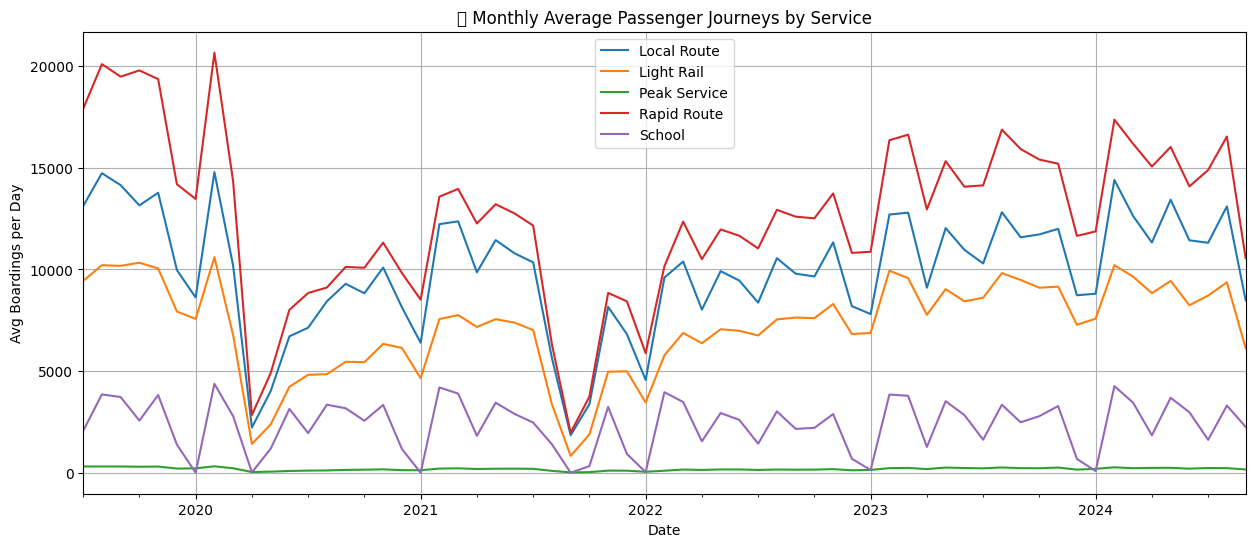

In [44]:
df.set_index('Date', inplace=True)
services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

# Summary stats
summary = df[services].describe()
print("🔹 Summary Statistics:\n", summary)

# Average usage per weekday
weekday_avg = df[services].copy()
weekday_avg['Weekday'] = df.index.weekday
weekday_mean = weekday_avg.groupby('Weekday').mean()

# Correlation between services
correlation = df[services].corr()
print("\n🔹 Correlation between Services:\n", correlation)

# Monthly trends
monthly_avg = df[services].resample('M').mean()

# Plot Monthly Trends
monthly_avg.plot(figsize=(15, 6), title='📈 Monthly Average Passenger Journeys by Service')
plt.ylabel('Avg Boardings per Day')
plt.grid(True)
plt.show()
